# Life Expectancy

## 1. Import lib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load data

In [2]:
#dataframe
df = pd.read_csv("../data/Life_Expectancy_Data.csv")

## 3. EDA

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
# rename columns
df.rename(columns = {'Country':'country', 
                     'Year':'year', 
                     'Status':'status', 
                     'Life expectancy ':'life-exp', 
                     'Adult Mortality':'adult-mort',
                     'infant deaths':'infant-deaths', 
                     'Alcohol':'alcohol', 
                     'percentage expenditure':'per-exp', 
                     'Hepatitis B':'hepa',
                     'Measles ':'measles', 
                     ' BMI ':'bmi', 
                     'under-five deaths ':'under-five-deaths', 
                     'Polio':'polio', 
                     'Total expenditure':'total-exp',
                     'Diphtheria ':'dip', 
                     ' HIV/AIDS':'hiv', 
                     'GDP':'gdp', 
                     'Population':'pop',
                     ' thinness  1-19 years':'thin1-19', 
                     ' thinness 5-9 years':'thin5-9',
                     'Income composition of resources':'income', 
                     'Schooling':'school'}, inplace = True)

In [5]:
df.alcohol.describe()

count    2744.000000
mean        4.602861
std         4.052413
min         0.010000
25%         0.877500
50%         3.755000
75%         7.702500
max        17.870000
Name: alcohol, dtype: float64

In [6]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

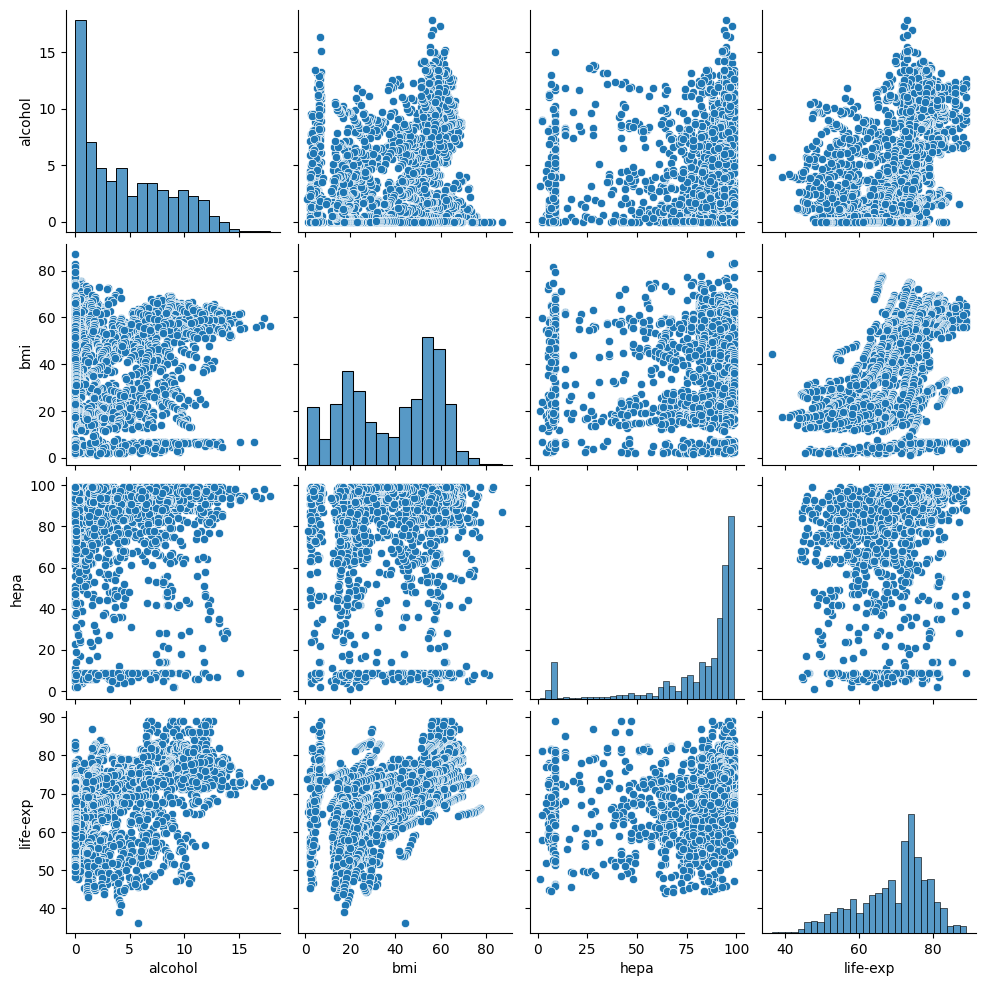

In [7]:
#multi-variate
sns.pairplot(df[['alcohol', 'bmi', 'hepa', 'life-exp']])

## 4. Feature Engineering

In [8]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

In [9]:
df['gdp-per-capita'] = df['gdp'] / df['pop']

In [10]:
df['gdp-per-capita'].describe()

count    2.264000e+03
mean     3.888643e-01
std      5.053968e+00
min      6.801655e-08
25%      1.261685e-04
50%      1.267219e-03
75%      1.226318e-02
max      1.882010e+02
Name: gdp-per-capita, dtype: float64

## 5. Feature Selection

In [11]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school', 'gdp-per-capita'],
      dtype='object')

In [12]:
#shape of (m, n)
X = df[ ['income', 'adult-mort', 'school'] ]
assert len(X.shape) == 2  #unit test  #you all should write unit test

#shape of (m,)
y = df['life-exp']  #sklearn support .fit with both pandas and numpy
assert len(y.shape) == 1

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 6. Preprocessing

In [14]:
X_train.isna().sum()

income        110
adult-mort      6
school        109
dtype: int64

### 6.1 fill income

In [15]:
df.income.dtype

dtype('float64')

<Axes: >

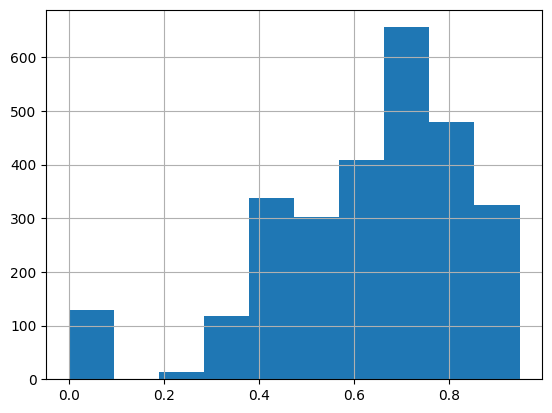

In [16]:
#decide whether to fill with median or mean
#look at distribution

df.income.hist()

In [17]:
df.income.mean(), df.income.median()

(0.6275510645976182, 0.677)

In [18]:
X_train['income'].fillna(X_train.income.median(), inplace=True)

In [19]:
X_train.isna().sum()

income          0
adult-mort      6
school        109
dtype: int64

In [20]:
X_train['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)
X_train['school'].fillna(X_train.school.median(), inplace=True)

In [21]:
X_train.isna().sum()

income        0
adult-mort    0
school        0
dtype: int64

In [22]:
X_test['income'].fillna(X_train.income.median(), inplace=True)
X_test['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)
X_test['school'].fillna(X_train.school.median(), inplace=True)

In [23]:
X_test.isna().sum()

income        0
adult-mort    0
school        0
dtype: int64

In [24]:
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_train.median(), inplace=True)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [26]:
X_train[:, 2].mean()  #adult-mort = 0
X_train[:, 2].std()  #adult-mort  = 1

0.9999999999999999

## 7. Model Selection

In [27]:
# tuple = (1, 2)  #cannot change --> shape
# list_ = [1, 2]  #can change, can add 
# dict_ = {"chaky": 1, "john": 2}  #dict --> fastest

In [28]:
#we should have done cross validation TO COMPARE ALGORITHMS

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

model_1 = DecisionTreeRegressor(criterion='squared_error', max_depth=3)
model_2 = LinearRegression(n_jobs=-1)
model_3 = RandomForestRegressor(n_jobs=-1, n_estimators=500)
model_4 = GradientBoostingRegressor(n_estimators=500)

models = (model_1, model_2, model_3, model_4)

In [29]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

#1. define the cv strategy
shuffle_strategy_cv = ShuffleSplit(n_splits=5, train_size=0.7, random_state=0)

#2. loop all the algorithms
for idx, model in enumerate(models):
    #2.1 in each algorithm, do cv
    scores = cross_val_score(model, X_train, y_train, cv = shuffle_strategy_cv, scoring='neg_mean_squared_error', n_jobs=-1)
    #scores = 5 score of this model on Xtrain ytrain
    #2.1 report the score in that cv
    print(f"{str(model.__class__)}; M: {scores.mean()} | S: {scores.std()}")  #higher mean; lower std
    

<class 'sklearn.tree._classes.DecisionTreeRegressor'>; M: -20.576876052771382 | S: 1.5631729072608014
<class 'sklearn.linear_model._base.LinearRegression'>; M: -25.650156580137196 | S: 1.219165687227353
<class 'sklearn.ensemble._forest.RandomForestRegressor'>; M: -5.765262963361596 | S: 0.3265641852673627


In [33]:
### Grid search

from sklearn.model_selection import RandomizedSearchCV

## you find the best model as RF, but you don't the best version of RF
## so you do gs to find the best version - how? using cross-validation under the hood

#1. define the parameters to search
search_space = {'n_estimators': [5, 10, 100]}

#2. define the model
model = RandomForestRegressor(n_jobs=-1)

#3. define the grid search
search = RandomizedSearchCV(model, search_space, n_iter=3, cv = shuffle_strategy_cv, n_jobs=-1, 
                            refit=True, return_train_score=True, scoring='neg_mean_squared_error')

#4. search!
search.fit(X_train, y_train)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=None, train_size=0.7),
                   estimator=RandomForestRegressor(n_jobs=-1), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'n_estimators': [5, 10, 100]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
search.best_params_

{'n_estimators': 100}

In [35]:
search.best_score_

-5.72815823642741

## 8. Testing

In [37]:
yhat = search.predict(X_test)
mean_squared_error(y_test, yhat)
r2_score(y_test, yhat)

0.9514373090618532

## 9. Analysis

In [39]:
model = search.best_estimator_

In [48]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(n_jobs=-1)>

In [42]:
model.feature_importances_

#feature 1 importance 0.52 --> income
#feature 2 importance 0.43 --> adult-mort
#feature 3 importance 0.03 --> school

array([0.52683019, 0.43915849, 0.03401131])

## 10. Inference

In [45]:
df['school'].describe()

count    2775.000000
mean       11.992793
std         3.358920
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: school, dtype: float64

In [46]:
fake_X = np.array([[0.62, 164, 11]])
fake_X.shape

(1, 3)

In [47]:
search.predict(fake_X)

array([52.133])